### Metro Interstate Traffic Volume

### Abstract: Hourly Minneapolis-St Paul, MN traffic volume for westbound I-94. Includes weather and holiday features from 2012-2018.
https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume

1. holiday Categorical US National holidays plus regional holiday, Minnesota State Fair 
2. temp Numeric Average temp in kelvin 
3. rain_1h Numeric Amount in mm of rain that occurred in the hour 
4. snow_1h Numeric Amount in mm of snow that occurred in the hour 
5. clouds_all Numeric Percentage of cloud cover 
6. weather_main Categorical Short textual description of the current weather 
7. weather_description Categorical Longer textual description of the current weather 
8. date_time DateTime Hour of the data collected in local CST time 
9. traffic_volume Numeric Hourly I-94 ATR 301 reported westbound traffic volume

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset from csv to data frame
df_traffic_data = pd.read_csv('datasets/Metro_Interstate_Traffic_Volume.csv')

In [3]:
df_traffic_data.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
df_traffic_data.shape

(48204, 9)

In [5]:
df_traffic_data.dtypes

holiday                 object
temp                   float64
rain_1h                float64
snow_1h                float64
clouds_all               int64
weather_main            object
weather_description     object
date_time               object
traffic_volume           int64
dtype: object

In [6]:
df_traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
holiday                48204 non-null object
temp                   48204 non-null float64
rain_1h                48204 non-null float64
snow_1h                48204 non-null float64
clouds_all             48204 non-null int64
weather_main           48204 non-null object
weather_description    48204 non-null object
date_time              48204 non-null object
traffic_volume         48204 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


#### No null value is present in the data.

In [7]:
df_traffic_data.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [9]:
df_traffic_data.describe(include='object')

,holiday,weather_main,weather_description,date_time
count,48204,48204,48204,48204
unique,12,11,38,40575
top,None,Clouds,sky is clear,2013-05-19 10:00:00
freq,48143,15164,11665,6


In [11]:
print("max date :" +df_traffic_data.date_time.max())
print("min date :" +df_traffic_data.date_time.min())

max date :2018-09-30 23:00:00
min date :2012-10-02 09:00:00


##### data is collected over 6 years

### Univariate Analysis

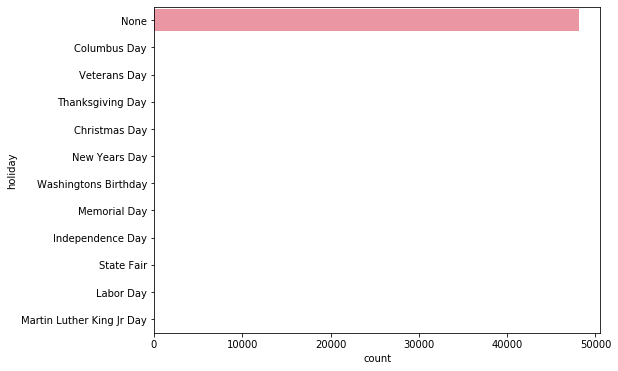

In [13]:
#Plotting frequency of each category in holiday column
plt.figure(figsize = (8,6))
sns.countplot(y='holiday', data = df_traffic_data)
plt.show()

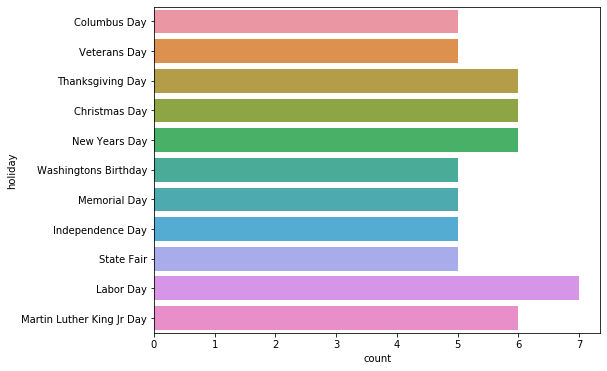

In [14]:
#'None' is far greater than the other days. Removing None data to visualize the others
holidays = df_traffic_data.loc[df_traffic_data.holiday != 'None']
plt.figure(figsize=(8,6))
sns.countplot(y='holiday', data= holidays)
plt.show()

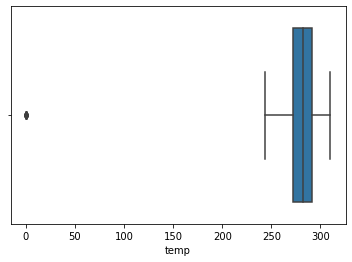

In [17]:
#plotting distribution of temperature variable
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = df_traffic_data)
plt.show()

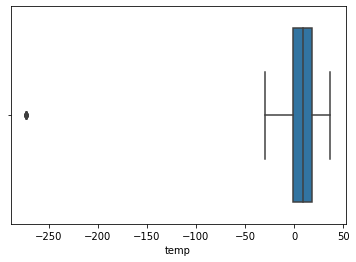

In [18]:
#Temperature is measured in Kelvin, changing to degree celsius to make it more intuitive
#convert kelvin to celsius
#(0K − 273.15)
df_traffic_data['temp'] = (df_traffic_data['temp']-273.15)
plt.figure(figsize=(6,4))
sns.boxplot('temp', data = df_traffic_data)
plt.show()

In [19]:
#There is one data point far away from the rest around -300 degrees celsius. Clearly, this is an error in recording.
#Eliminating will be eliminated in the data cleaning phase.

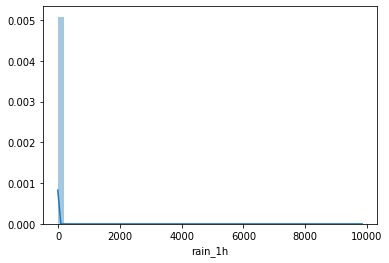

In [20]:
#Plotting rain variable
plt.figure(figsize=(6,4))
sns.distplot(df_traffic_data.rain_1h)
plt.show()
#From the distribution, it shows that the data is extremely skewed. Most of the observations are concentrated around 0.

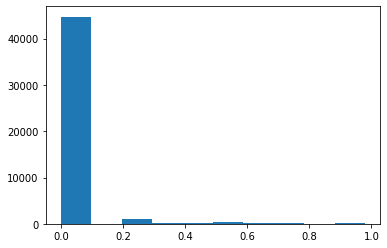

In [25]:
#Plotting observations with values less than 1mm rain shows that more than 40000 observations are around 0.
plt.hist(df_traffic_data.rain_1h.loc[df_traffic_data.rain_1h<1])
plt.show()

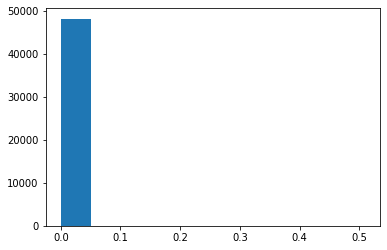

In [28]:
#Plotting snow variable indicates that data is again skewed and most of the observations have value close to 0.0.
plt.hist(df_traffic_data.snow_1h)
plt.show()

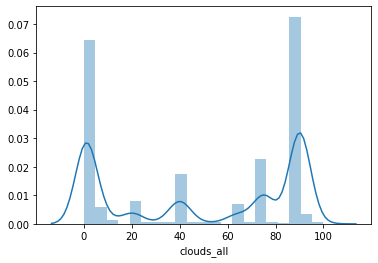

In [32]:
#clouds_all indicates the cloud coverage for the give day and hour
sns.distplot(df_traffic_data.clouds_all)
plt.show()

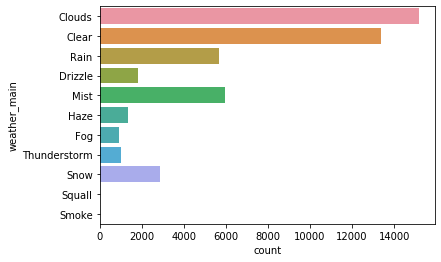

In [33]:
#exploring different categories in weather_main
sns.countplot(y='weather_main', data=df_traffic_data)

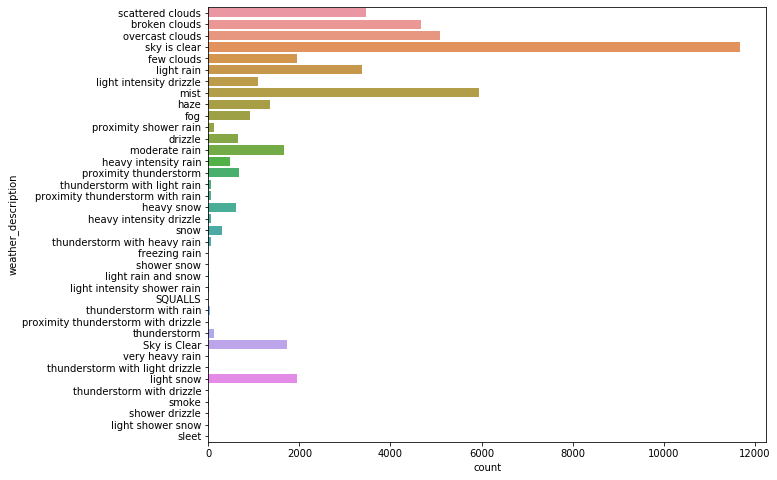

In [37]:
#exploring different categories in weather_description
plt.figure(figsize=(10,8))
sns.countplot(y='weather_description', data=df_traffic_data)
plt.show()

### Bivariate Analysis

Exploring relationship between traffic and other features

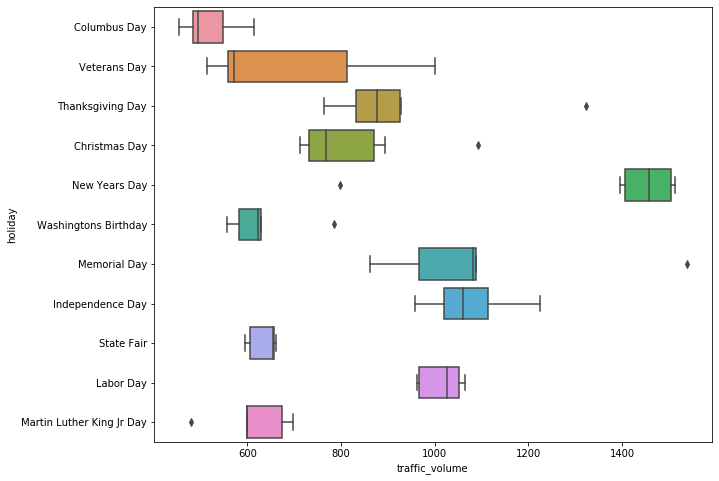

In [41]:
#Exploring traffic volume on holidays
plt.figure(figsize=(10,8))
sns.boxplot(y='holiday',x='traffic_volume', data = holidays)
plt.show()

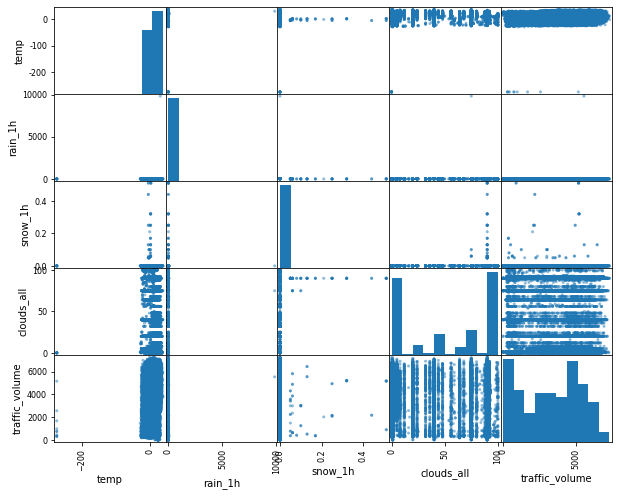

In [45]:
#Plotting relationship between temp, rain_1h, snow_1h, cloud_all.
num_vars = ['temp','rain_1h','snow_1h','clouds_all','traffic_volume']
from pandas.plotting import scatter_matrix
scatter_matrix(df_traffic_data[num_vars],figsize=(10,8))
plt.show()

<Figure size 720x576 with 0 Axes>

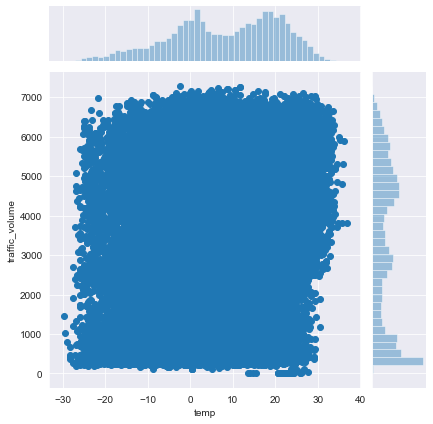

In [49]:
#plotting temperature against traffic volume
plt.figure(figsize=(10,8))
sns.set_style('darkgrid')
sns.jointplot(y='traffic_volume', x='temp', data = df_traffic_data.loc[df_traffic_data.temp>-50])
plt.show()

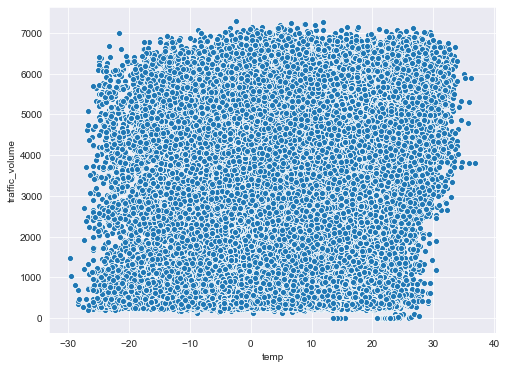

In [50]:
#scatterplot between traffic_volume and temp
plt.figure(figsize=(8,6))
sns.scatterplot(y='traffic_volume', x='temp', data = df_traffic_data.loc[df_traffic_data.temp>-50])

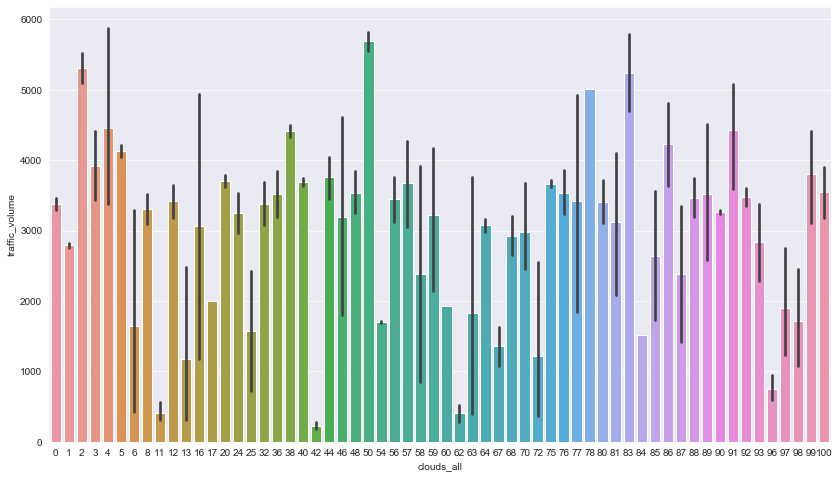

In [55]:
#Plotting traffic volume over clouds_all
plt.figure(figsize=(14,8))
sns.barplot(x='clouds_all', y = 'traffic_volume', data = df_traffic_data)
plt.show()

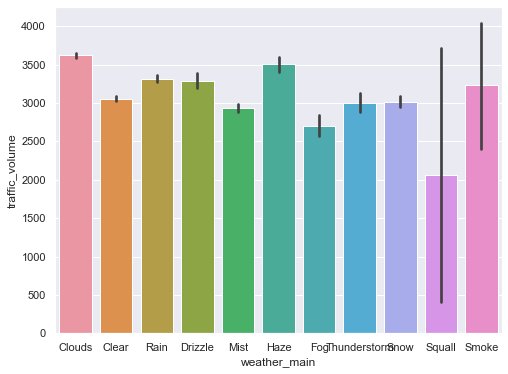

In [57]:
#Plotting weather_main over traffic volume
plt.figure(figsize=(8,6))
sns.barplot(x='weather_main', y = 'traffic_volume', data = df_traffic_data)
plt.show()

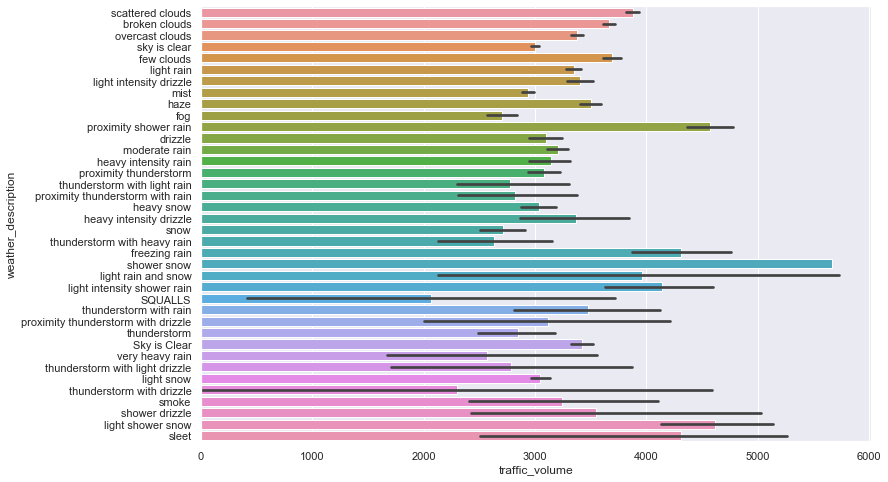

In [61]:
#Plotting weather_description over traffic volume
plt.figure(figsize=(12,8))
sns.barplot(y='weather_description', x = 'traffic_volume', data = df_traffic_data)
plt.show()

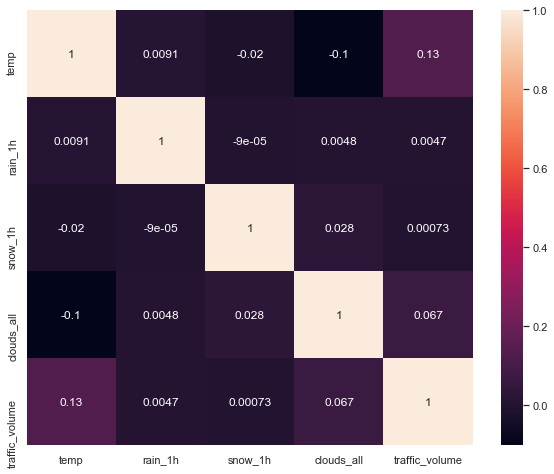

In [63]:
#correlation between different numeric variables. plot shows no strong correlation between traffic and other variables
sns.heatmap(df_traffic_data.corr(), annot=True)
plt.show()

### Feature engineering and Data cleaning

In [64]:
#copying data to new data frame
df_traffic_features = df_traffic_data.copy()

In [72]:
#Extracting features from date_time variable
df_traffic_features['date_time'] = pd.to_datetime(df_traffic_features.date_time)
df_traffic_features['weekday'] = df_traffic_features.date_time.dt.weekday
df_traffic_features['date'] = df_traffic_features.date_time.dt.date
df_traffic_features['hour'] = df_traffic_features.date_time.dt.hour
df_traffic_features['month'] = df_traffic_features.date_time.dt.month
df_traffic_features['year'] = df_traffic_features.date_time.dt.year
#Monday is 0 and Sunday is 6

In [66]:
df_traffic_features.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,weekday,date,hour,month
0,None,15.13,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,1,2012-10-02,9,10
1,None,16.21,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,1,2012-10-02,10,10
2,None,16.43,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,1,2012-10-02,11,10
3,None,16.98,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,1,2012-10-02,12,10
4,None,17.99,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,1,2012-10-02,13,10


In [73]:
#categorizing hours to different time periods like morning, afternoon etc
def hour_modify(x):
    Early_Morning = [4,5,6,7]
    Morning = [8,9,10,11]
    Afternoon = [12,13,14,15]
    Evening = [16,17,18,19]
    Night = [20,21,22,23]
    Late_Night = [24,1,2,3]
    if x in Early_Morning:
        return 'Early_Morning'
    elif x in Morning:
        return 'Morning'
    elif x in Afternoon:
        return 'Afternoon'
    elif x in Evening:
        return 'Evening'
    elif x in Night:
        return 'Night'
    else:
        return 'Late_Night'
    
df_traffic_features['hour'] = df_traffic_features.hour.map(hour_modify)

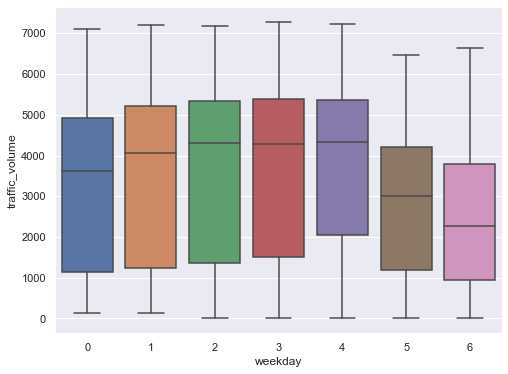

In [74]:
#Traffic volume plotted against weekday. Weekends show less traffic volume.
plt.figure(figsize=(8,6))
sns.boxplot(x='weekday', y='traffic_volume', data = df_traffic_features)
plt.show()

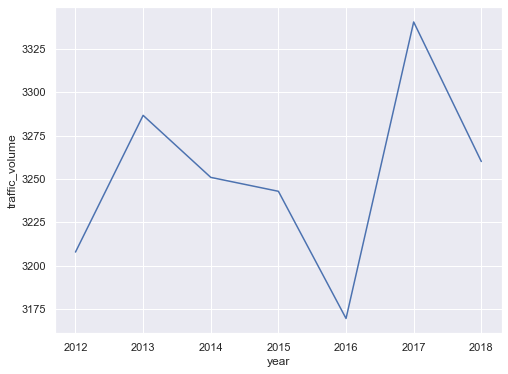

In [85]:
#aggreagating traffic volume over year and plotting 

df_date_traffic = df_traffic_features.groupby('year').aggregate({'traffic_volume':'mean'})
plt.figure(figsize=(8,6))
sns.lineplot(x = df_date_traffic.index, y = df_date_traffic.traffic_volume, data = df_date_traffic)
plt.show()

In [86]:
#Other holidays are very sparse compared to none holidays. 
#Hence encoding the holidays as TRUE and none Holidays as FALSE

def modify_holiday(x):
    if x == 'None':
        return False
    else:
        return True
df_traffic_features['holiday'] = df_traffic_features['holiday'].map(modify_holiday)

In [87]:
#Outlier in temp which was detected earlier needs to be removed
df_traffic_features = df_traffic_features.loc[df_traffic_features.temp>-250]

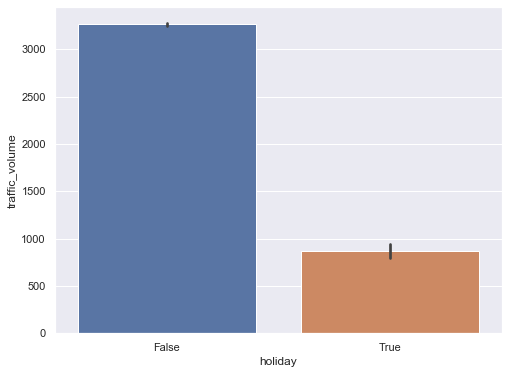

In [92]:
#Traffic volume difference during holiday and non holiday
plt.figure(figsize=(8,6))
sns.barplot(x='holiday', y='traffic_volume', data = df_traffic_features)
plt.show()

In [95]:
#clouds, rain and snow distribution over different weather conditions
df_traffic_features.groupby('weather_description').aggregate({'traffic_volume':[np.mean,np.size],
                                                              'clouds_all':'count','rain_1h':'mean','snow_1h':'mean'})

traffic_volume        clouds_all  \
                                              mean   size      count   
weather_description                                                    
SQUALLS                                2061.750000      4          4   
Sky is Clear                           3423.148899   1726       1726   
broken clouds                          3661.142092   4666       4666   
drizzle                                3094.858679    651        651   
few clouds                             3691.453476   1956       1956   
fog                                    2703.720395    912        912   
freezing rain                          4314.000000      2          2   
haze                                   3502.101471   1360       1360   
heavy intensity drizzle                3371.109375     64         64   
heavy intensity rain                   3140.072805    467        467   
heavy snow                             3031.472403    616        616   
light intensity drizzle                3400.567273   1100       1100   
light intensity shower rain            4140.307692     13         13   
light rain                             3349.257117   3372       3372   
light rain and snow                    3961.166667      6          6   
light shower snow                      4618.636364     11         11   
light snow                             3042.770298   1946       1946   
mist                                   2932.956639   5950       5950   
moderate rain                          3202.603966   1664       1664   
overcast clouds                        3375.963590   5081       5081   
proximity shower rain                  4567.845588    136        136   
proximity thunderstorm                 3076.457652    673        673   
proximity thunderstorm with drizzle    3117.538462     13         13   
proximity thunderstorm with rain       2819.269231     52         52   
scattered clouds                       3875.622363   3461       3461   
shower drizzle                         3547.666667      6          6   
shower snow                            5664.000000      1          1   
sky is clear                           3003.014843  11655      11655   
sleet                                  4312.666667      3          3   
smoke                                  3237.650000     20         20   
snow                                   2712.122867    293        293   
thunderstorm                           2843.752000    125        125   
thunderstorm with drizzle              2297.000000      2          2   
thunderstorm with heavy rain           2631.142857     63         63   
thunderstorm with light drizzle        2779.266667     15         15   
thunderstorm with light rain           2776.833333     54         54   
thunderstorm with rain                 3476.405405     37         37   
very heavy rain                        2568.833333     18         18   

                                        rain_1h   snow_1h  
                                           mean      mean  
weather_description                                        
SQUALLS                                3.482500  0.000000  
Sky is Clear                           0.000000  0.000000  
broken clouds                          0.000000  0.000000  
drizzle                                0.118710  0.000000  
few clouds                             0.000000  0.000000  
fog                                    0.087007  0.000625  
freezing rain                          0.000000  0.000000  
haze                                   0.046868  0.000000  
heavy intensity drizzle                0.170156  0.000000  
heavy intensity rain                   2.656660  0.000000  
heavy snow                             0.001234  0.000000  
light intensity drizzle                0.180600  0.000000  
light intensity shower rain            0.333077  0.000000  
light rain                             0.129404  0.000068  
light rain and snow                    0.211667  0.000000  
lig

In [96]:
df_traffic_features['weather_description'] = df_traffic_features['weather_description'].map(lambda x:x.lower())

In [97]:
#The weather description mostly describes rain, snow, thunderstorms, fog, mist and haze.

#I will create following new columns:
#thunderstorm - True where weather description contains Thunderstorm else False
#fog - True where weather description contains fog else False
#mist - True where weather description contains mist else False
#haze - True where weather description contains haze else False

In [98]:
#Any row containing "thunderstorm" is replaced by "thunderstorm"
df_traffic_features.loc[df_traffic_features['weather_description'].str.contains('thunderstorm'),'weather_description'] = 'thunderstorm'    

In [99]:
weather = ['thunderstorm','mist','fog','haze']
df_traffic_features.loc[np.logical_not(df_traffic_features['weather_description'].isin(weather)),'weather_description'] = 'other'

In [100]:
df_traffic_features.weather_description.value_counts()

other           38938
mist             5950
haze             1360
thunderstorm     1034
fog               912
Name: weather_description, dtype: int64

In [102]:
#creating dummy variables for these newly created categories in weather description
df_traffic_features = pd.get_dummies(columns=['weather_description'],data=df_traffic_features)

In [104]:
df_traffic_features.rename(columns={'weather_description_fog':'fog', 'weather_description_haze':'haze',
                                   'weather_description_mist':'mist', 'weather_description_thunderstorm':'thunderstorm'}, inplace = True)
df_traffic_features.drop(columns = ['weather_description_other', 'weather_main'], inplace = True)

In [105]:
df_traffic_features.columns

Index(['holiday', 'temp', 'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
       'date_time', 'traffic_volume', 'weekday', 'date', 'hour', 'month',
       'year', 'fog', 'haze', 'mist', 'thunderstorm'],
      dtype='object')

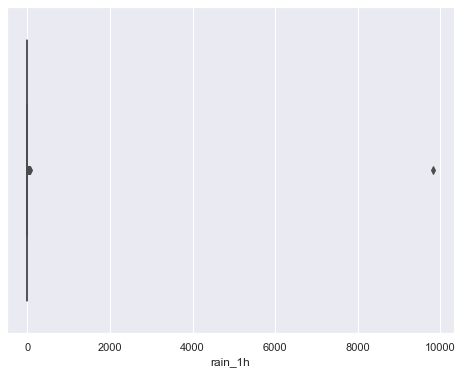

In [107]:
#Plotiing rain data shows one outlier data point. Lets remove it.
plt.figure(figsize=(8,6))
sns.boxplot('rain_1h',data = df_traffic_features)
plt.show()

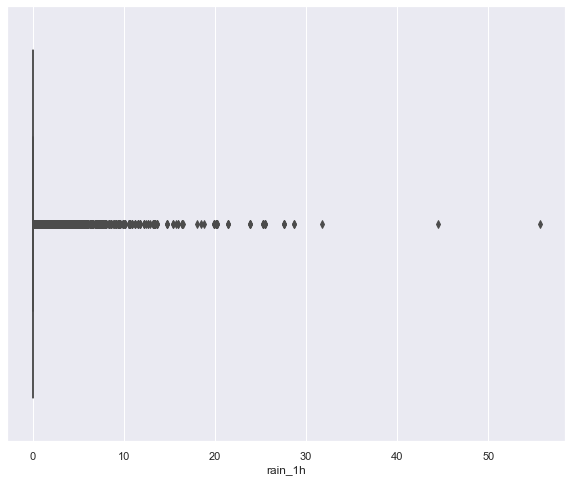

In [108]:
sns.boxplot('rain_1h',data = df_traffic_features.loc[df_traffic_features.rain_1h<2000])

In [116]:
#Removing outlier in rain column and converting numeric data to categories
#rain value equal to 0.0 as no_rain
#rain value greater than 0.0 is cut into 3 quantiles

df_traffic_features = df_traffic_features.loc[df_traffic_features.rain_1h<2000]
df_traffic_features_temp = df_traffic_features.loc[df_traffic_features.rain_1h>0]
rain_q = pd.qcut(df_traffic_features_temp['rain_1h'] ,q=3, labels=['light','moderate','heavy'])
df_traffic_cat = df_traffic_features.merge(rain_q,left_index=True, right_index=True, how='left')
df_traffic_cat['rain_1h_y'] = df_traffic_cat.rain_1h_y.cat.add_categories('no_rain')
df_traffic_cat['rain_1h_y'].fillna('no_rain', inplace = True) #no_rain is not in the category, adding it and filling

df_traffic_cat.drop(columns=['rain_1h_x'], inplace = True)
df_traffic_cat.rename(columns={'rain_1h_y':'rain_1h'}, inplace = True)
df_traffic_cat.head()

,holiday,temp,snow_1h,clouds_all,weather_main,date_time,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm,rain_1h
0,False,15.13,0.0,40,Clouds,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
1,False,16.21,0.0,75,Clouds,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
2,False,16.43,0.0,90,Clouds,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012,0,0,0,0,no_rain
3,False,16.98,0.0,90,Clouds,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012,0,0,0,0,no_rain
4,False,17.99,0.0,75,Clouds,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012,0,0,0,0,no_rain


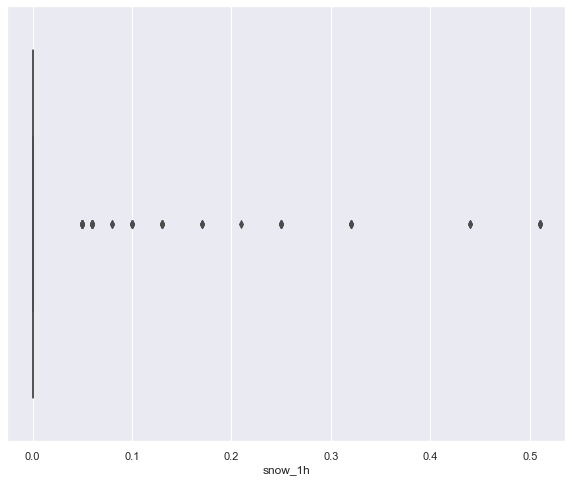

In [113]:
#Plotiing snow data shows that it is extremely skewed as observed during univariate analysis
sns.boxplot('snow_1h',data = df_traffic_features)

In [119]:
#only 63 observations have snow greater than 0.0, it can be encoded as no_snow and 
df_traffic_features.snow_1h[df_traffic_features.snow_1h>0].count()
#63 columns -> change to snow, no_snow

63

In [120]:
def modify_snow1h(x):
    if x==0:
        return 'no_snow'
    else:
        return 'snow'
    
df_date_traffic['snow_1h'] = df_traffic_cat.snow_1h.map(modify_snow1h)

In [121]:
df_traffic_features.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time,traffic_volume,weekday,date,hour,month,year,fog,haze,mist,thunderstorm
0,False,15.13,0.0,0.0,40,Clouds,2012-10-02 09:00:00,5545,1,2012-10-02,Morning,10,2012,0,0,0,0
1,False,16.21,0.0,0.0,75,Clouds,2012-10-02 10:00:00,4516,1,2012-10-02,Morning,10,2012,0,0,0,0
2,False,16.43,0.0,0.0,90,Clouds,2012-10-02 11:00:00,4767,1,2012-10-02,Morning,10,2012,0,0,0,0
3,False,16.98,0.0,0.0,90,Clouds,2012-10-02 12:00:00,5026,1,2012-10-02,Afternoon,10,2012,0,0,0,0
4,False,17.99,0.0,0.0,75,Clouds,2012-10-02 13:00:00,4918,1,2012-10-02,Afternoon,10,2012,0,0,0,0


In [122]:
#setting date as index
df_traffic_cat.set_index('date', inplace = True)

In [123]:
df_traffic_cat.columns

Index(['holiday', 'temp', 'snow_1h', 'clouds_all', 'weather_main', 'date_time',
       'traffic_volume', 'weekday', 'hour', 'month', 'year', 'fog', 'haze',
       'mist', 'thunderstorm', 'rain_1h'],
      dtype='object')

In [124]:
target = ['traffic_volume']
cat_vars = ['holiday', 'snow_1h','weekday', 'hour', 'month', 'year', 'fog', 'haze','mist', 'thunderstorm', 'rain_1h']
num_vars = ['temp','clouds_all']

In [129]:
#Creating pipeline to transform data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[
    ('oneHot',OneHotEncoder())])

preprocessor = ColumnTransformer(transformers=[
    ('num',numeric_transformer,num_vars),
    ('cat',categorical_transformer,cat_vars)])

df_traffic_transformed = preprocessor.fit_transform(df_traffic_cat).toarray()

In [130]:
#Splitting data into train and test data

X_train = df_traffic_transformed[:32290]
X_test = df_traffic_transformed[32291:]
y_train = df_traffic_cat.traffic_volume[:32290]
y_test = df_traffic_cat.traffic_volume[32291:]

In [131]:
#Fitting XGBoost regressor and parameter tuning using Grid search
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

tscv = TimeSeriesSplit(n_splits=3)
model = xgb.XGBRegressor()

param_grid = {'nthread':[4,6,8], 
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

GridSearch = GridSearchCV(estimator = model,param_grid= param_grid,cv=tscv, n_jobs = 2 )
GridSearch.fit(X_train, y_train)
y_pred = GridSearch.predict(X_test)

In [132]:
#Root mean square
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_pred=y_pred,y_true=y_test))
print(RMSE)

1015.7556971111933


In [133]:
#RMSE is not so great. Next I will explore models specfic for time series data like ARIMA